In [2]:
!pip3 install numpy matplotlib open3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Read camera poses from a text file
file_path = './assets/red_block_dataset/red_block_correct_pose.txt'  # Replace with the actual file path
with open(file_path, 'r') as file:
    lines = file.readlines()

camera_poses = []
for line in lines:
    pose = [float(value) for value in line.strip().replace('[', '').replace(']', '').split(', ')]
    camera_poses.append(np.array(pose).reshape(4, 4))

# Define camera intrinsics
K = np.eye(3)
K[0, 0] = 920.88464355  # fx
K[1, 1] = 924.34155273  # fy
K[0, 2] = 613.90703152  # cx
K[1, 2] = 389.5955547  # cy

# Define the object center and bounding box dimensions
object_center = np.array([0.4, 0, 0.25])
bounding_box_dims = np.array([0.4, 0.4, 0.4])

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.0 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 52.3 MB/s eta 0:00:01
     |████████████████████████████████| 40.4 MB 60.6 MB/s eta 0:00:01
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
     |████████████████████████████████| 3.1 MB 21.1 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 2.6 MB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 34.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 39.1 MB/s eta 0:00:01
  Using cached Werkzeug-2.3.6-py3-none-any.whl (24

In [3]:
camera_poses[0]

array([[-5.70952668e-01, -4.54833918e-01,  6.83468286e-01,
        -8.17120979e-02],
       [-2.91210775e-01,  8.90565354e-01,  3.49389083e-01,
        -2.86667560e-01],
       [-7.67587182e-01,  4.51300056e-04, -6.40935543e-01,
         4.55916920e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [ ]:
def convert_4x4_to_3x4(camera_pose_4x4):
    # Extract rotation matrix
    rotation_matrix = camera_pose_4x4[:3, :3]

    # Extract translation vector
    translation_vector = camera_pose_4x4[:3, 3]

    # Create 3x4 camera pose matrix
    camera_pose_3x4 = np.concatenate((rotation_matrix, translation_vector.reshape(3, 1)), axis=1)

    return camera_pose_3x4

In [ ]:
new_poses = [convert_4x4_to_3x4(p) for p in camera_poses]

In [ ]:
new_poses

In [ ]:
with open('new_poses.txt', 'w') as f:
    for line in [p.flatten().tolist() for p in new_poses]:
        f.writelines(str(line) + "\n")

In [ ]:
# Plot camera positions and orientations
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot camera positions and orientations
for i, pose in enumerate(camera_poses):
    position = pose[:3, 3]
    orientation = pose[:3, :3]

    # Plot camera position
    ax.scatter(position[0], position[1], position[2], c='b', marker='o', label='Camera' if i == 0 else "")

    # Plot camera orientation
    arrow_length = 0.1
    ax.quiver(position[0], position[1], position[2], orientation[0, 2], orientation[1, 2], orientation[2, 2],
              length=arrow_length, normalize=True, color='b')

# Plot the object center
ax.scatter(object_center[0], object_center[1], object_center[2], c='g', marker='o', label='Object Center')

# Plot the 3D bounding box
bbox_min = object_center - bounding_box_dims / 2
bbox_max = object_center + bounding_box_dims / 2

x = [bbox_min[0], bbox_max[0], bbox_max[0], bbox_min[0], bbox_min[0], bbox_max[0], bbox_max[0], bbox_min[0]]
y = [bbox_min[1], bbox_min[1], bbox_max[1], bbox_max[1], bbox_min[1], bbox_min[1], bbox_max[1], bbox_max[1]]
z = [bbox_min[2], bbox_min[2], bbox_min[2], bbox_min[2], bbox_max[2], bbox_max[2], bbox_max[2], bbox_max[2]]

ax.plot(x, y, z, color='g', label='Bounding Box')

# Set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cameras(poses):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for pose in poses:
        # Extract camera T and orientation from the pose
        T = pose[:3, 3]
        R = pose[:3, :3]
        
        # Define the camera direction vector
        direction = R[:, 2]
        
        # Define the camera cone vertices
        cone_vertices = np.array([
            [0.0, 0.0, 0.0],
            [0.1, 0.05, 0.05],
            [0.1, -0.05, 0.05],
            [0.1, -0.05, -0.05],
            [0.1, 0.05, -0.05]
        ])
        
        # Apply the camera transformation to the cone vertices
        rotated_cone = np.dot(R, cone_vertices.T) + t[:, np.newaxis]
        
        # Plot the camera cone
        ax.plot(rotated_cone[:, 0], rotated_cone[:, 1], rotated_cone[:, 2], color='blue')
        
        # Plot a line segment from the camera T in the direction it's facing
        ax.plot([T[0], T[0] + direction[0]],
                [T[1], T[1] + direction[1]],
                [T[2], T[2] + direction[2]], color='red')

    # Set plot limits and labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    # Show the plot
    plt.show()

plot_cameras(camera_poses)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the camera cone vertices
cone_vertices = np.array([
    [0.0, 0.0, 0.0],
    [0.1, 0.05, 0.05],
    [0.1, -0.05, 0.05],
    [0.1, -0.05, -0.05],
    [0.1, 0.05, -0.05]
])

sq_poses = [
    np.array([1728.9198, 469.558533, -3.45716858, 36293.168, 97.1319504, 248.860031, -1719.5282, 44065.4258, 0.0909126997, 0.988125861, -0.123863481, 56.8904305]),
    np.array([1621.76611, 761.269409, -1.99562073, 36250.4297, 58.1319618, 253.553177, -1720.60291, 44039.1562, -0.0808197111, 0.988356173, -0.128919736, 56.8722153]),
    np.array([1466.57568, 1028.98193, -3.59236908, 36290.0625, 18.6208038, 249.992249, -1722.00476, 44091.7578, -0.24931486, 0.958953321, -0.135094777, 56.9597168]),
    np.array([1265.94592, 1267.66211, -8.62017059, 36383.2031, -20.9857025, 238.582092, -1723.59546, 44188.4062, -0.411498725, 0.900322914, -0.141730368, 57.0990334]),
    np.array([1028.19067, 1467.04419, -16.324585, 36472.2734, -58.7024231, 220.120743, -1725.17944, 44289.5, -0.560443461, 0.814847589, -0.148076251, 57.2459793]),
]

sq_poses = [p.reshape(3,4) for p in sq_poses]

# Plot camera poses with camera cones
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for pose in sq_poses:
#     # Extract rotation and translation
#     pose = pose.reshape(3,4)
#     R = pose[:3, :3]
#     t = pose[:3, 3]

#     # Apply the camera transformation to the cone vertices
#     transformed_vertices = np.dot(R, cone_vertices.T) + t[:, np.newaxis]

#     # Plot camera cone
#     ax.plot3D(transformed_vertices[0], transformed_vertices[1], transformed_vertices[2], 'b-')
#     ax.scatter3D(t[0], t[1], t[2], color='r')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()

plot_cameras(sq_poses)

[[-5.70952668e-01 -4.54833918e-01  6.83468286e-01 -8.17120979e-02]
 [-2.91210775e-01  8.90565354e-01  3.49389083e-01 -2.86667560e-01]
 [-7.67587182e-01  4.51300056e-04 -6.40935543e-01  4.55916920e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


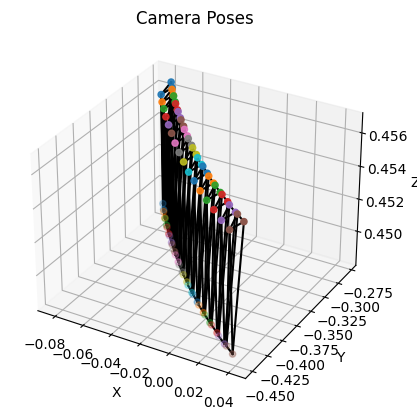

In [11]:
# import open3d as o3d
import csv
import numpy as np
import ast
from scipy.spatial.transform import Rotation as R



class CameraPoseShower:

    def __init__(self) -> None:

        self.poses = []
        self.width = 1280
        self.height = 720
        self.cx = 629.14694662
        self.cy = 314.33765115
        self.fx = 923.65667725
        self.fy = 919.3928833
        self.tx = 0.0
        self.ty = 0.0
        self.tz = 0.0

        with open(file_path, mode='r') as file:
            for line in file:
                string_list = line.rstrip('\n')
                list  = ast.literal_eval(string_list)
                pose = np.array(list)
                pose = np.reshape(pose, (4,4))
                self.poses.append(pose)
        
        print(self.poses[0])
    
    def get_camera_geometry(self, pose):
        # Compute the camera frustum points in camera coordinate system
        frustum_points = 0.005 * np.array([[0.0, 0.0, 0.0],  # Camera center
                                        [-1.0, -1.0, 1.0],  # Top-left corner
                                        [1.0, -1.0, 1.0],  # Top-right corner
                                        [1.0, 1.0, 1.0],  # Bottom-right corner
                                        [-1.0, 1.0, 1.0]])  # Bottom-left corner
        # Transform frustum points to world coordinate system using camera pose
        frustum_points_world = np.dot(pose[:3, :3], frustum_points.T).T + pose[:3, 3]

        # Create a line geometry for the camera frustum
        lines = [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [2, 3], [3, 4], [4, 1]]

        return frustum_points_world, lines


    # def get_camera_geometry(self,pose):
    #     # Compute the camera frustum points in camera coordinate system
    #     frustum_points = 0.005* np.array([[0.0, 0.0, 0.0],  # Camera center
    #                             [-1.0, -1.0, 1.0],  # Top-left corner
    #                             [1.0, -1.0, 1.0],  # Top-right corner
    #                             [1.0, 1.0, 1.0],  # Bottom-right corner
    #                             [-1.0, 1.0, 1.0]])  # Bottom-left corner
    #     # Transform frustum points to world coordinate system using camera pose
        
    #     print(frustum_points)
    #     frustum_points_world = np.dot(pose[:3, :3], frustum_points.T).T + pose[:3, 3]
    #     print(frustum_points_world)
    #     # Create a line geometry for the camera frustum
    #     lines = [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [2, 3], [3, 4], [4, 1]]
    #     line_set = o3d.geometry.LineSet()
    #     line_set.points = o3d.utility.Vector3dVector(frustum_points_world)
    #     line_set.lines = o3d.utility.Vector2iVector(lines)
    #     return line_set

    # def display_poses(self):

    #     visualizer = o3d.visualization.Visualizer()
        

        
 
    #     for camera_index,pose in enumerate(self.poses):
    #         ee_to_camera = np.array([[1, 0, 0, 0.307, 0, 1, 0, 0, 0, 0, 1, 0.487, 0, 0, 0, 1]]).reshape(4,4)
    #         rotation = R.from_euler("xyz",[180,0,0],degrees=True).as_matrix()
    #         #pose[:3,:3] = pose[:3,:3] @ rotation
    #         visualizer.create_window(window_name="Camera Pose", width=800, height=600)
    #         camera_geometry = self.get_camera_geometry(pose)
    #         if camera_index == 0:
    #             colors = [[1, 0, 0] for _ in range(len(camera_geometry.lines))]
    #             camera_geometry.colors = o3d.utility.Vector3dVector(colors)
    #         visualizer.add_geometry(camera_geometry)
    #     visualizer.run()

    def display_poses(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for camera_index, pose in enumerate(self.poses):
            ee_to_camera = np.array([[1, 0, 0, 0.307, 0, 1, 0, 0, 0, 0, 1, 0.487, 0, 0, 0, 1]]).reshape(4, 4)
            rotation = R.from_euler("xyz", [180, 0, 0], degrees=True).as_matrix()




            frustum_points_world, lines = self.get_camera_geometry(pose)
            # Extract camera coordinates and plot
            camera_coords = frustum_points_world
            ax.scatter(camera_coords[:, 0], camera_coords[:, 1], camera_coords[:, 2])

            # Extract camera lines and plot
            for line in lines:
                start = camera_coords[line[0]]
                end = camera_coords[line[1]]
                ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 'k-')

        # Set plot labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Camera Poses')

        # Show the plot
        plt.show()



        

if __name__ == "__main__":
    c = CameraPoseShower()
    c.display_poses()

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement open3d-cpu (from versions: none)
ERROR: No matching distribution found for open3d-cpu
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
